In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
from sklearn.datasets import fetch_covtype

In [3]:
import time

In [4]:
# Load dataset
ds = fetch_covtype()

In [5]:
# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(ds.data, columns=ds.feature_names)

In [6]:
# Add the target variable to the dataframe
df['Cover_Type'] = ds.target

In [7]:
# Extract features and target
y = df['Cover_Type']  # output variable
x = df.drop(['Cover_Type'], axis=1)  # features to drop

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)  # set training and test data

In [9]:
# Start a timer for calculating the elapsed time to perform feature selection with 
# RFE technique with `n_features_to_select`=20
rfe_start_time = time.time()

model = RandomForestClassifier(n_estimators=100, random_state=42)  # base model
rfe = RFE(estimator=model, n_features_to_select=20)  # initialize rfe
rfe.fit(X_train, y_train)  # fit rfe

# End timer
rfe_end_time = time.time()
# Compute elapsed time
rfe_elapsed_time = rfe_end_time - rfe_start_time
print("Time taken for RFE's feature selection:", rfe_elapsed_time, "seconds")

Time taken for RFE's feature selection: 6871.382829427719 seconds


In [10]:
# Get the ranking of each feature
feature_ranking = rfe.ranking_

In [11]:
# Get the selected features
selected_features = np.where(feature_ranking == 1)[0]

In [12]:
print("All features:")
print(x.columns.values)

All features:
['Elevation' 'Aspect' 'Slope' 'Horizontal_Distance_To_Hydrology'
 'Vertical_Distance_To_Hydrology' 'Horizontal_Distance_To_Roadways'
 'Hillshade_9am' 'Hillshade_Noon' 'Hillshade_3pm'
 'Horizontal_Distance_To_Fire_Points' 'Wilderness_Area_0'
 'Wilderness_Area_1' 'Wilderness_Area_2' 'Wilderness_Area_3' 'Soil_Type_0'
 'Soil_Type_1' 'Soil_Type_2' 'Soil_Type_3' 'Soil_Type_4' 'Soil_Type_5'
 'Soil_Type_6' 'Soil_Type_7' 'Soil_Type_8' 'Soil_Type_9' 'Soil_Type_10'
 'Soil_Type_11' 'Soil_Type_12' 'Soil_Type_13' 'Soil_Type_14'
 'Soil_Type_15' 'Soil_Type_16' 'Soil_Type_17' 'Soil_Type_18'
 'Soil_Type_19' 'Soil_Type_20' 'Soil_Type_21' 'Soil_Type_22'
 'Soil_Type_23' 'Soil_Type_24' 'Soil_Type_25' 'Soil_Type_26'
 'Soil_Type_27' 'Soil_Type_28' 'Soil_Type_29' 'Soil_Type_30'
 'Soil_Type_31' 'Soil_Type_32' 'Soil_Type_33' 'Soil_Type_34'
 'Soil_Type_35' 'Soil_Type_36' 'Soil_Type_37' 'Soil_Type_38'
 'Soil_Type_39']


In [13]:
# Print the selected features
print("Selected Features:", selected_features)

Selected Features: [ 0  1  2  3  4  5  6  7  8  9 10 12 13 17 23 25 35 36 51 52]


In [14]:
# Train the final model using the selected features
i = 0
j = 0
while i < len(X_train.columns):
    if j not in selected_features:
        X_train = X_train.drop(X_train.columns[i], axis=1)
        X_test = X_test.drop(X_test.columns[i], axis=1)
        i -= 1
    i += 1
    j += 1
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print("Accuracy on the Test Set:", accuracy)

Accuracy on the Test Set: 0.9542178130572174


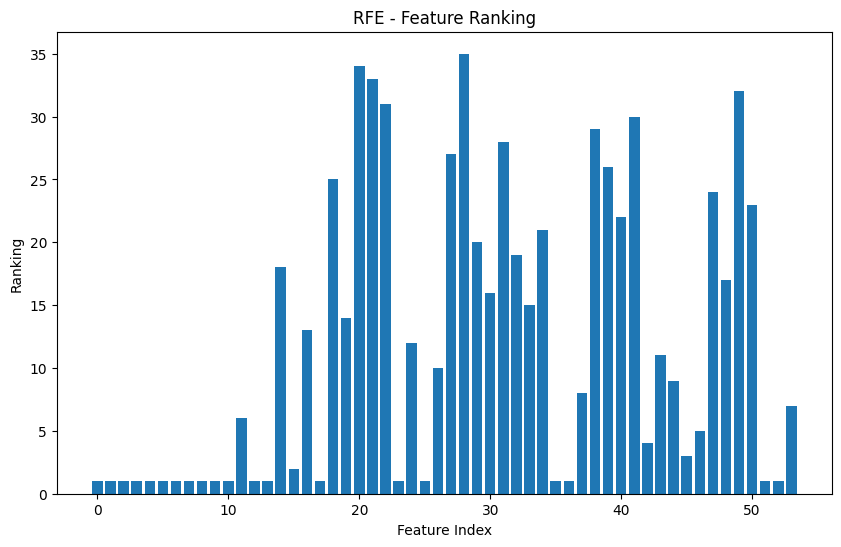

In [16]:
# Visualize the feature ranking
plt.figure(figsize=(10, 6))
plt.title("RFE - Feature Ranking")
plt.xlabel("Feature Index")
plt.ylabel("Ranking")
plt.bar(range(len(feature_ranking)), feature_ranking)
plt.show()